# Modeling a Double Pendulum
By Marion Madanguit and Nicola van Moon

In [23]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

import math

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Question

The double pendulum is known to be one of the most chaotic mechanical systems in existence. Its motion is characterized by rich dynamic swinging in all degrees and directions. Although seemingly erratic, the motion of the double pendulum can be predicted with an understanding of the physical laws governing it.

Our primary goal is to create a model of the double pendulum. With our model, we hope to be able to predict the motion of the double pendulum given any initial position. In other words, we are aiming to answer the following question: Given the initial positions of the two masses on a double penduluum, what motion does the system undergo? Having a model of this system will not only offer us an interesting visual experience but it will allow us to graphically plot the impact of slight changes in initial position and perhaps give us a greater understanding of the chaos of the double pendulum.

In [45]:
%%html
<img src="Images/Schematic.jpg",width=40,height=30>

## Model

{In the Model section, a well-labeled schematic diagram of the system (with objects, dimensions, forces, and axes) and the set of differential equations that govern the behavior of the system under the assumptions you have made. (from the concept sketch)

(M) All three representations of your model: schematic diagram, differential equations, and implementation in Python. 
(M) An explanation of the decisions you made in creating your model.
How are you going to answer your proposed question? 
What assumptions are you making? Are these good or bad assumptions?
What are the stocks and flows in your model? Provide a diagram.
What are the differential equations representing your model?
How did you develop and refine your model?
How did you set the parameters of your model?
How did you validate your model?
These explanations should be thorough and belong in the essay portion of the text, not in code comments.
(M) The documented code you wrote to create your simulation.
Remember that some information belongs in doc strings and other code comments rather than in the essay portion of the text.}

We started by creating force diagrams for the two masses on the double pendulum. 

We assumed the rods were massless and the masses were point masses. We assumed that friction and air resistance were neglegable to the system. Each mass is acted on by the force of gravity and the forces of tension from the rod(s) touching it. If the real system usese a light material for the rods and a dense material for a mass at the ends which would make this assumption relitively accurate. Friction only occurs at the pivot points which can have low friction so ignoring friction is a somewhat reasonable assumption. Air resistance also probably has a small effect at such low velocitys. 

The equation for the force of gravity is known as \( F_g = mg \) but the tension forces have unknown magnitudes.

However the system is possible to model because it is constrained. The rods cannot stretch which means that the magnitude of the position vector R1 must always equal L1 and the magnitude of R2 must always equal L2.
From this knowledge we can write the equations for motion:

\[ x_1 = L_1sin\theta_1 \]
\[ y_1 = L_1cos\theta_1 \]
\[ x_2 = x_1 + L_2sin\theta_2\]
\[ y_2 = y_1 + L_2cos\theta_2 \]

where \(x_1\) and \(y_1\) are the x components of \(R_1\) and \(x_2\) and \(y_2\) are the x components of \(R_2\).

Using Newton's 2nd Law, we can relate the position and the forces of each mass:
\[m_1x_1''=-F_{T1}sin\theta_1 + F_{T2}sin\theta_2\]
\[m_1y_1''=-F_{T1}cos\theta_1 + F_{T2}cos\theta_2-m_1g\]
\[m_2x_2''=-F_{T2}sin\theta_2\]
\[m_2y_2''=-F_{T2}cos\theta_2 -m_2g\]


By taking the second derivitaves of the motion equations and combining them with the force equations, an expression can be written that only contains \(\theta\), \(\theta\)',  \(\theta\)'', \(m_1\), \(m_2\), \(L_1\), \(L_2\), and g. All of these are knowns except \(\theta\) and its derivitives so this equation can be solved using computer algebra.
We used the resulting equation for \(\theta\)'' as the basis for our model:

\[\theta_1'' = \frac{-g(2m_1 + m2)sin\theta_1 - m_2gsin(\theta_1-2\theta_2)-2sin(\theta_1-\theta_2)m_2(\theta_2'^2 L_2+\theta_1'^2L_1cos(\theta_1-\theta_2))}{L_1(2m_1+m_2-m_2cos(2\theta_1-2\theta_2))}\]

\[\theta_2'' = \frac{2sin(\theta_1 - \theta_2)(\theta_1'^2L_1(m_1+m_2)+g(m_1+m_2)cos\theta_1 + \theta_2'^2L_2m_2cos(\theta_1-\theta_2)}{L_2(2m_1+m_2-m_2cos(2\theta_1-2\theta_2))}\]

We split this into two first order differential equations by saying that \(\theta' = \omega\) and \(\omega' = \theta''\) and wrote it into a slope function. We tracked \(\theta_1\), \(\theta_2\), \(\omega_1\), and \(\omega_2\) and ran an ODE solver.

We converted the angular position back into a vector using the position equations and plotted the results.


-> talk about initial conditions/parameters...
-> create docstrings


In [46]:
m = 1
s = 1
minute = 1
day = 1
kg = 1

1

In [47]:
t_0 = 0 * s
t_end = 5 * s
dt = 0.01 * s

params = Params(L1 = 1 * m,
                L2 = 1 * m,
                M1 = 1 * kg,
                M2 = 1 * kg,
                V1_init = 0 * m / s,
                V3_init = 0 * m / s,
                theta1_init = 90 * pi / 180, # in rad
                theta2_init = -90 * pi / 180, # in rad
                omega1_init = 0 / s, # in rad / s
                omega2_init = 0 / s, # in rad / s
                g = 9.8 * m / s**2,
                t_0=t_0, t_end=t_end, dt=dt)

L1             1.000000
L2             1.000000
M1             1.000000
M2             1.000000
V1_init        0.000000
V3_init        0.000000
theta1_init    1.570796
theta2_init   -1.570796
omega1_init    0.000000
omega2_init    0.000000
g              9.800000
t_0            0.000000
t_end          5.000000
dt             0.010000
dtype: float64

In [48]:
def make_system(params):

    # angular positions
    theta1 = params.theta1_init
    theta2 = params.theta2_init

    # angular velocities
    omega1 = params.omega1_init
    omega2 = params.omega2_init

    init = State(theta1 = theta1, theta2 = theta2, omega1 = omega1, omega2 = omega2)

    return System(params, init=init)

system = make_system(params)

L1                                                             1
L2                                                             1
M1                                                             1
M2                                                             1
V1_init                                                        0
V3_init                                                        0
theta1_init                                               1.5708
theta2_init                                              -1.5708
omega1_init                                                    0
omega2_init                                                    0
g                                                            9.8
t_0                                                            0
t_end                                                          5
dt                                                          0.01
init           theta1    1.570796
theta2   -1.570796
omega1  ...
dtype: object

In [49]:
def slope_func(state, t, system):

    theta1, theta2, omega1, omega2 = state
    M1, M2, g = system.M1, system.M2, system.g
    L1, L2 = system.L1, system.L2

    dtheta1dt = omega1
    dtheta2dt = omega2

#    print(-g*(2*M1+M2)*math.sin(theta1))
#    print(M2 * g * math.sin(theta1 - 2*theta2))
#    print(2 * math.sin(theta1 - theta2) * M2 *(L2*omega2**2 + L1*math.cos(theta1 - theta2)*omega1**2))
#    print(L1 * (2*M1 + M2 - M2*math.cos(2*theta1-2*theta2)))
#    print('_')

    domega1dt = (-g * (2*M1 + M2) * math.sin(theta1) - M2 * g * math.sin(theta1 - 2*theta2) - 2 * math.sin(theta1 - theta2) * M2 *(L2*omega2**2 + L1*math.cos(theta1 - theta2)*omega1**2)) / (L1 * (2*M1 + M2 - M2*math.cos(2*theta1-2*theta2)))
    domega2dt = (2 * math.sin(theta1-theta2) * ((M1+M2)*L1*omega1**2 + g*(M1+M2)*math.cos(theta1) + L2*M2*math.cos(theta1-theta2)*omega2**2)) / (L2 * (2*M1 + M2 - M2*math.cos(2*theta1-2*theta2)))

    return dtheta1dt, dtheta2dt, domega1dt, domega2dt

In [50]:
slope_func(system.init, 0, system)

(0.0, 0.0, -9.8, 1.4697645870086205e-31)

In [51]:
def event_func(state, t, system):

    return system.t_end - t

In [52]:
results, details = run_ode_solver(system, slope_func, events=event_func)
details

success                                                 True
message    The solver successfully reached the end of the...
dtype: object

In [53]:
results

theta1     theta2    omega1        omega2
0.00  1.570796  -1.570796  0.000000  0.000000e+00
0.01  1.570306  -1.570796 -0.098000  7.841005e-21
0.02  1.568836  -1.570796 -0.196000  6.849773e-07
0.03  1.566386  -1.570796 -0.293996  6.164707e-06
0.04  1.562956  -1.570796 -0.391984  2.732431e-05
...        ...        ...       ...           ...
4.96  1.277769  12.473559 -2.004891 -4.401027e+00
4.97  1.256732  12.429987 -2.200205 -4.309741e+00
4.98  1.233765  12.387365 -2.390880 -4.210555e+00
4.99  1.208916  12.345777 -2.576508 -4.102434e+00
5.00  1.182236  12.305317 -2.756682 -3.984444e+00

[501 rows x 4 columns]

In [54]:
def pol_vector(mag, angle, offset, direction): # maybe move this cell down?
    x, y = pol2cart(direction*angle + offset, mag)
    return Vector(x, y)

def pol_vector1(mag, angle):
    x, y = pol2cart(angle+3*pi/2, mag)
    return Vector(x, y)

def pol_vector2(mag, angle):
    x, y = pol2cart(-1*angle+3*pi/2, mag)
    return Vector(x, y)

In [55]:
def get_R1(theta):
    return pol_vector(system.L1, theta, 3*pi/2, 1) #3pi/2 because it is measured from the negative y axis, 1 becasue it is clockwise

def get_R2(theta):
    return pol_vector(system.L2, theta, 3*pi/2, -1) #3pi/2 because it is measured from the negative axis, -1 because it is measured counter -clockwise

def get_R3(R1, R2):
    return R1 + R2

In [56]:
def vectorize_results(results):
    get_R1_vectorized = np.vectorize(get_R1) # numpy vectorize transforms function so that it can operate on and return numpy arrays
    get_R2_vectorized = np.vectorize(get_R2)
    get_R3_vectorized = np.vectorize(get_R3)

    results['R1'] = get_R1_vectorized(results['theta1'])
    results['R2'] = get_R2_vectorized(results['theta2'])
    results['R3'] = get_R3_vectorized(results['R1'], results['R2'])
    return results

results = vectorize_results(results)

theta1     theta2    omega1        omega2  \
0.00  1.570796  -1.570796  0.000000  0.000000e+00   
0.01  1.570306  -1.570796 -0.098000  7.841005e-21   
0.02  1.568836  -1.570796 -0.196000  6.849773e-07   
0.03  1.566386  -1.570796 -0.293996  6.164707e-06   
0.04  1.562956  -1.570796 -0.391984  2.732431e-05   
...        ...        ...       ...           ...   
4.96  1.277769  12.473559 -2.004891 -4.401027e+00   
4.97  1.256732  12.429987 -2.200205 -4.309741e+00   
4.98  1.233765  12.387365 -2.390880 -4.210555e+00   
4.99  1.208916  12.345777 -2.576508 -4.102434e+00   
5.00  1.182236  12.305317 -2.756682 -3.984444e+00   

                                                     R1  \
0.00  [1.0 dimensionless, -2.4492935982947064e-16 di...   
0.01  [0.9999998799500024 dimensionless, -0.00048999...   
0.02  [0.999998079201422 dimensionless, -0.001959998...   
0.03  [0.9999902760139816 dimensionless, -0.00440997...   
0.04  [0.9999692679847036 dimensionless, -0.00783983...   
...                                                 ...   
4.96  [0.9573737152215225 dimensionless, -0.28885215...   
4.97  [0.9510859874616594 dimensionless, -0.30892627...   
4.98  [0.9437406286123416 dimensionless, -0.33068659...   
4.99  [0.9352326592506668 dimensionless, -0.35403371...   
5.00  [0.9254554516609568 dimensionless, -0.37885644...   

                                                     R2  \
0.00  [1.0 dimensionless, -2.4492935982947064e-16 di...   
0.01  [1.0 dimensionless, -2.4492935982947064e-16 di...   
0.02  [1.0 dimensionless, -7.058942548407496e-10 dim...   
0.03  [0.9999999999999998 dimensionless, -1.88498881...   
0.04  [0.9999999999999906 dimensionless, -1.37672146...   
...                                                 ...   
4.96  [0.09267887280441003 dimensionless, -0.9956960...   
4.97  [0.1359611971852979 dimensionless, -0.99071416...   
4.98  [0.17805113029450984 dimensionless, -0.9840212...   
4.99  [0.2188088472648794 dimensionless, -0.97576774...   
5.00  [0.25809829646206794 dimensionless, -0.9661186...   

                                                     R3  
0.00  [2.0 dimensionless, -4.898587196589413e-16 dim...  
0.01  [1.9999998799500025 dimensionless, -0.00048999...  
0.02  [1.999998079201422 dimensionless, -0.001959999...  
0.03  [1.9999902760139814 dimensionless, -0.00440999...  
0.04  [1.999969267984694 dimensionless, -0.007839977...  
...                                                 ...  
4.96  [1.0500525880259326 dimensionless, -1.28454820...  
4.97  [1.0870471846469574 dimensionless, -1.29964043...  
4.98  [1.1217917589068516 dimensionless, -1.31470783...  
4.99  [1.1540415065155463 dimensionless, -1.32980146...  
5.00  [1.1835537481230247 dimensionless, -1.34497510...  

[501 rows x 7 columns]

## Results

To answer our initial question, we ran our stimulation for 3 different starting positions and plotted the motion of the two masses over a period of 5 seconds. The motion of the first mass is represented by a green line and the motion of the second mass is represented by a red line.

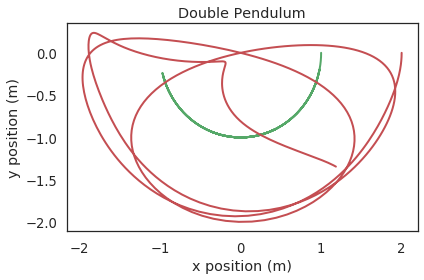

In [70]:
%matplotlib inline
R1_x = results.R1.extract('x')
R1_y = results.R1.extract('y')
R3_x = results.R3.extract('x')
R3_y = results.R3.extract('y')

def plot_results(results):

    plot(R1_x, R1_y, color='C2')
    plot(R3_x, R3_y, color='C3')

    decorate(title='Double Pendulum',
             xlabel='x position (m)',
             ylabel='y position (m)')

plot_results(results)

In [80]:
def draw_func(state, t):
    set_xlim(R1_x)
    set_ylim(R1_y)
    x, y = state.R1
    plot(x, y, 'bo')
    decorate(xlabel='x position (m)',
             ylabel='y position (m)')

# animate(results, draw_func)

In [81]:
#Simulating with different initial conditions:
def run_with_angle(angle):
    %matplotlib inline
    params = Params(L1 = 1 * m,
                    L2 = 1 * m,
                    M1 = 1 * kg,
                    M2 = 1 * kg,
                    V1_init = 0 * m / s,
                    V3_init = 0 * m / s,
                    theta1_init = angle * pi / 180, # in rad
                    theta2_init = -1*angle * pi / 180, # in rad
                    omega1_init = 0 / s, # in rad / s
                    omega2_init = 0 / s, # in rad / s
                    g = 9.8 * m / s**2,
                    t_0=t_0, t_end=t_end, dt=dt)
    system = make_system(params)
    results2, details = run_ode_solver(system, slope_func, events=event_func)
    results2 = vectorize_results(results2)
    plot_results(results2)

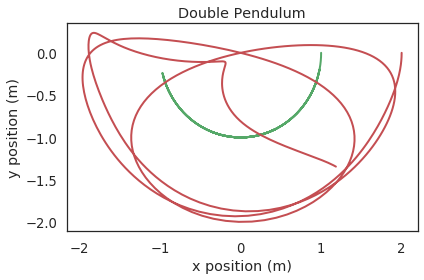

In [82]:
run_with_angle(161)

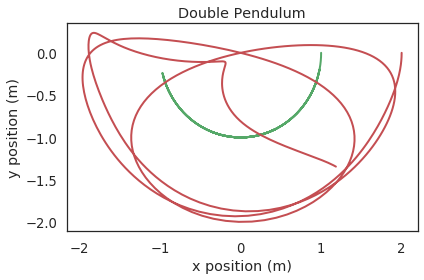

In [79]:
run_with_angle(30)

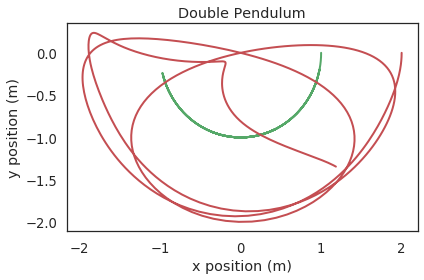

In [74]:
params = Params(L1 = 1 * m,
                L2 = 1 * m,
                M1 = 1 * kg,
                M2 = 1 * kg,
                V1_init = 0 * m / s,
                V3_init = 0 * m / s,
                theta1_init = 163 * pi / 180, # in rad
                theta2_init = -163 * pi / 180, # in rad
                omega1_init = 0 / s, # in rad / s
                omega2_init = 0 / s, # in rad / s
                g = 9.8 * m / s**2,
                t_0=t_0, t_end=t_end, dt=dt)
system = make_system(params)
results2, details = run_ode_solver(system, slope_func, events=event_func)
results2 = vectorize_results(results2)
plot_results(results2)

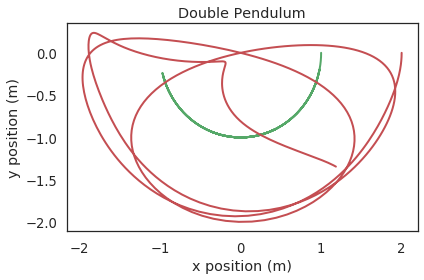

In [77]:
params = Params(L1 = 1 * m,
                L2 = 1 * m,
                M1 = 1 * kg,
                M2 = 1 * kg,
                V1_init = 0 * m / s,
                V3_init = 0 * m / s,
                theta1_init = 165 * pi / 180, # in rad
                theta2_init = -165 * pi / 180, # in rad
                omega1_init = 0 / s, # in rad / s
                omega2_init = 0 / s, # in rad / s
                g = 9.8 * m / s**2,
                t_0=t_0, t_end=t_end, dt=dt)
system = make_system(params)
results3, details = run_ode_solver(system, slope_func, events=event_func)
results3 = vectorize_results(results3)
plot_results(results3)

## Interpretation 

(I) In the Interpretation section, acknowledgment of any significant failings of the model accompanied by explanation of what measures were taken to address the problem and what additional steps would be taken next if the project were to continue.
Significant failings might include (but are not limited to) a model that does not answer the question, a model that has so many limitations and assumptions that the output is meaningless, or a model that does not go beyond simple statistical modeling (e.g., showing correlations between variables).
(I) A few sentences in the Interpretation section explaining the role of iteration in your modeling process.

Our simulations confirms the chaotic motion of a double pendulum, with even a 1odegree change in initial angle, the motion of the outer mass is compleatly different. 

By not including friction or air resistance in our model, we made an undampened system which means the pendulum will never come to 
a rest. The lack of dapening forces also means that our model is somewhat inaccurate. The longer we run the simulation for the more inacurate it gets because the motion should be more dampened but continues with the same energy in our simulation. Additionally, small changes that friction would have made to the pendulum's motion earlier in the simulation may lead to unpredictably inacurate results as time goes on due to the chaotic motion of the pendulum. We could add a friction force to model a dampened system which would be more realistic, however unless our friction force could be exactly accurate, we would not avoid the compounding inacuracy that comes from the chaos of the system. 

Our model is sucessful at showing the chaos of the system and what the motion of a double pendulum could look like but it would be bad at predicting the motion of a real life double pendulum. Any tiny differences between our model and the real system based on our assumptions or imprecision in the physical system would create large discrepencies between our predicted behavior and the real motion as the simulation got further in time. 

It was extremely difficult to iterate within our model. To model the system, even in its simplist form, the equations are already extremly complex. To beguin making it more acurate we could have began to change our model to illiminate some of our assumptions. The main itteration that we did was looking at the equations for a single pendulum to understand the system before each step of the equations for the double pendulum. The analogous single pendulum equations helped us understand what equations we were using and make sure that we were doing things that made sense. <- could be rewritten to be a bit less clunky and confusing